# COVID-19 Dataset
https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not. 

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- `sex`: 1 for female and 2 for male.
- `age`: of the patient.
- `classification`: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- `patient type`: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- `pneumonia`: whether the patient already have air sacs inflammation or not.
- `pregnancy`: whether the patient is pregnant or not.
- `diabetes`: whether the patient has diabetes or not.
- `copd`: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- `asthma`: whether the patient has asthma or not.
- `inmsupr`: whether the patient is immunosuppressed or not.
- `hypertension`: whether the patient has hypertension or not.
- `cardiovascular`: whether the patient has heart or blood vessels related disease.
- `renal chronic`: whether the patient has chronic renal disease or not.
- `other disease`: whether the patient has other disease or not.
- `obesity`: whether the patient is obese or not.
- `tobacco`: whether the patient is a tobacco user.
- `usmr`: Indicates whether the patient treated medical units of the first, second or third level.
- `medical` unit: type of institution of the National Health System that provided the care.
- `intubed`: whether the patient was connected to the ventilator.
- `icu`: Indicates whether the patient had been admitted to an Intensive Care Unit.
- `date died`: If the patient died indicate the date of death, and 9999-99-99 otherwise.

CONSIDERATIONS: 
- This dataset doesn't contain a target column. You have to generate the target column considering the people that died or not (field `date died`)
- The dataset maybe it's unbalance. Have this into consideration for your analysis
- Don't forget to try all the models that we learned in class, try different hyperparameters with the Grid Search and DOCUMENT ALL YOUR CONCLUSIONS AND THOUGHTS IN THE JUPYTER NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('00-Covid-Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


# Análisis exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15



*   Tenemos 21 Columnas y 1048575 Filas.
*   Todas las columnas son de tipo enteras excepto DATE_DIED.


*   Dado que los valores 97 y 99 son considerados nulos habrá que analizarlos y tratarlos según convenga.


*   En las características booleanas, el valor 1 significa "sí" y el valor 2 significa "no".
*   La columna objetivo deberé crearla teniendo en cuenta la columna
    DATE_DIED, para saber el estado del paciente.


In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01




En primera instancia, observando la descripción del dataframe no soy capaz de sacar una conclusión. Por lo tanto procederé a crear la columna objetivo para obtener más información.

**Creo la nueva columna surviving_patients** , donde 1 es que el paciente ha sobrevivido.

In [5]:
df["surviving_patients"] = df["DATE_DIED"].apply(lambda x: 0 if x != "9999-99-99" else 1)
pacientes_sobrevivientes = df["surviving_patients"].value_counts()[1]


print("Número de pacientes sobrevivientes(target):", pacientes_sobrevivientes)

Número de pacientes sobrevivientes(target): 971633


In [6]:
df 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,surviving_patients
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,0
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,0
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,0
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97,1


Uso df asecas, en vez de .head() porque se muestran tanto las 5 primeras filas como las 5 finales, y se puede apreciar ambos valores de la nueva columna

**Convierto los datos booleanos del dataframe con valores  2 y 1 a 0 y 1** , para intentar tener todos los datos en la misma escala, ya que por norma general los datos booleanos son representados como en surviving_patients.

In [7]:
# Excluyo las columnas CLASIFICATION_FINAL Y AGE ya que no son booleanas.
columnas_excluir = ['CLASIFFICATION_FINAL','AGE']

# Reemplazo todos los valores 2 por 0 en las columnas excepto las excluidas
df[df.columns.difference(columnas_excluir)] = df[df.columns.difference(columnas_excluir)].replace(2, 0)

In [8]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,surviving_patients
0,0,1,1,1,03/05/2020,97,1,65,0,0,0,0,0,1,0,0,0,0,0,3,97,0
1,0,1,0,1,03/06/2020,97,1,72,97,0,0,0,0,1,0,0,1,1,0,5,97,0
2,0,1,0,0,09/06/2020,1,0,55,97,1,0,0,0,0,0,0,0,0,0,3,0,0
3,0,1,1,1,12/06/2020,97,0,53,0,0,0,0,0,0,0,0,0,0,0,7,97,0
4,0,1,0,1,21/06/2020,97,0,68,97,1,0,0,0,1,0,0,0,0,0,3,97,0


## Valores Nulos

In [9]:
print(f"Columnas que continen valores 97 99:\n")
for columna in df.columns:
    # Filtrar las celdas que contienen 97 o 99 en la columna actual
    valores_97_99 = df[columna].isin([97, 99])
    # Contar la cantidad de valores 97 o 99 en la columna actual
    cuenta = valores_97_99.sum()
    # Imprimir el nombre de la columna y la cuenta de valores
    print(f"Columna: {columna} - Contiene: {cuenta} Nulos")

Columnas que continen valores 97 99:

Columna: USMER - Contiene: 0 Nulos
Columna: MEDICAL_UNIT - Contiene: 0 Nulos
Columna: SEX - Contiene: 0 Nulos
Columna: PATIENT_TYPE - Contiene: 0 Nulos
Columna: DATE_DIED - Contiene: 0 Nulos
Columna: INTUBED - Contiene: 855869 Nulos
Columna: PNEUMONIA - Contiene: 16003 Nulos
Columna: AGE - Contiene: 221 Nulos
Columna: PREGNANT - Contiene: 523511 Nulos
Columna: DIABETES - Contiene: 0 Nulos
Columna: COPD - Contiene: 0 Nulos
Columna: ASTHMA - Contiene: 0 Nulos
Columna: INMSUPR - Contiene: 0 Nulos
Columna: HIPERTENSION - Contiene: 0 Nulos
Columna: OTHER_DISEASE - Contiene: 0 Nulos
Columna: CARDIOVASCULAR - Contiene: 0 Nulos
Columna: OBESITY - Contiene: 0 Nulos
Columna: RENAL_CHRONIC - Contiene: 0 Nulos
Columna: TOBACCO - Contiene: 0 Nulos
Columna: CLASIFFICATION_FINAL - Contiene: 0 Nulos
Columna: ICU - Contiene: 856032 Nulos
Columna: surviving_patients - Contiene: 0 Nulos


Con este for podemos sacar una lista real de valores nulos para poder tratar los nulos

*   INTUBED - Contiene: 855869 Nulos
*   PNEUMONIA - Contiene: 16003 Nulos
*   AGE - Contiene: 221 Nulos
*   PREGNANT - Contiene: 523511 Nulos
*   ICU - Contiene: 856032 Nulos

Para mi análisis considero  **eliminar la columna INTUBED ,ICU**  , ya que a mi parecer son columnas con demasiados nulos y no creo que sean tan relevantes a la hora de entrenar.


In [10]:
drop_cols = ["DATE_DIED","INTUBED","ICU"]
df = df.drop(drop_cols, axis=1)

In [11]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,surviving_patients
0,0,1,1,1,1,65,0,0,0,0,0,1,0,0,0,0,0,3,0
1,0,1,0,1,1,72,97,0,0,0,0,1,0,0,1,1,0,5,0
2,0,1,0,0,0,55,97,1,0,0,0,0,0,0,0,0,0,3,0
3,0,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,0,7,0
4,0,1,0,1,0,68,97,1,0,0,0,1,0,0,0,0,0,3,0


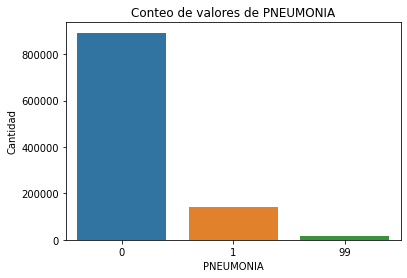

In [12]:
# Contar los valores de la columna "PNEUMONIA"
conteo_pneumonia = df['PNEUMONIA'].value_counts()

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x=conteo_pneumonia.index, y=conteo_pneumonia.values)

# Agregar etiquetas y título al gráfico
plt.xlabel('PNEUMONIA')
plt.ylabel('Cantidad')
plt.title('Conteo de valores de PNEUMONIA')

# Mostrar el gráfico
plt.show()

Con este gráfico podemos deducir que son pocos los pacientes que no han rellenado el campo de pneumonia.

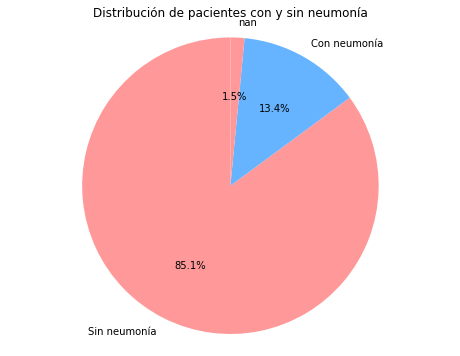

In [13]:
# Contar la distribución de pacientes con y sin neumonía
pneumonia_counts = df['PNEUMONIA'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.title('Distribución de pacientes con y sin neumonía')
plt.pie(pneumonia_counts, labels=pneumonia_counts.index.map({0: 'Sin neumonía', 1: 'Con neumonía'}), autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')

plt.show()


Observamos como los valores nulos suponen un 1,5% ,dado que la mayoria son sin neumonia , decido establecer ese 1,5% a pacientes sin neuomonia.

In [14]:
df['PNEUMONIA'] = df['PNEUMONIA'].replace([97, 99], 0)

In [15]:
df['PNEUMONIA'].unique()

array([1, 0])

In [16]:
# Iterar sobre las columnas del dataframe
for columna in df.columns:
    # Filtrar las celdas que contienen 97 o 99 en la columna actual
    valores_97_99 = df[columna].isin([97, 99])
    # Contar la cantidad de valores 97 o 99 en la columna actual
    cuenta = valores_97_99.sum()

    # Verificar si la columna tiene valores nulos
    if cuenta > 0:
        # Imprimir el nombre de la columna y la cuenta de valores
        print(f"Columna: {columna} - Contiene: {cuenta}")

Columna: AGE - Contiene: 221
Columna: PREGNANT - Contiene: 523511


Tras comprobar que el cambio se ha efectuado correctamente. continuo con los valores nulos de la columna PREGNANT

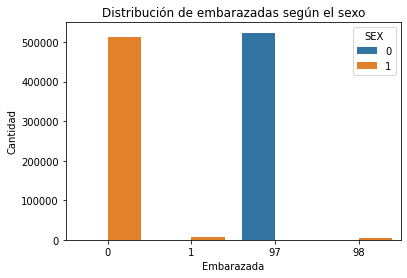

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para la variable "PREGNANT" en relación a la variable "SEX"
sns.countplot(data=df, x='PREGNANT', hue='SEX')

# Configurar etiquetas y título del gráfico
plt.xlabel('Embarazada')
plt.ylabel('Cantidad')
plt.title('Distribución de embarazadas según el sexo')

# Mostrar el gráfico
plt.show()


- Con este gráfico llegó a la conclusión de que en este caso, el valor 97 se corresponde con el sexo masculino, y decido sustituir dicho valor  97 por 0 para que no cuente como nulo y tampoco cuente como pregnant dado que son de sexo masculino.

- Inesperadamente, tambien me doy cuenta de que los valores 97 y 99 no parecen ser los únicos nulos, así que tendré que tomar en cuenta tambien el 98. para este caso concreto en la columna pregnant, también lo pondre a valor 0.

In [18]:
df.loc[(df['SEX'] == 0) & (df['PREGNANT'] == 97), 'PREGNANT'] = 0
df.loc[(df['SEX'] == 0) & (df['PREGNANT'] == 99), 'PREGNANT'] = 0
df.loc[(df['PREGNANT'] == 98), 'PREGNANT'] = 0

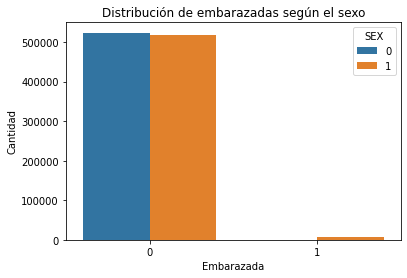

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para la variable "PREGNANT" en relación a la variable "SEX"
sns.countplot(data=df, x='PREGNANT', hue='SEX')

# Configurar etiquetas y título del gráfico
plt.xlabel('Embarazada')
plt.ylabel('Cantidad')
plt.title('Distribución de embarazadas según el sexo')

# Mostrar el gráfico
plt.show()

Despues de haber convertido los valores nulos, un vistazo a este gráfico me convenze de que el desvalanceo de esta columna es tan grande que no creo que aporte valor al análisis, por lo tanto voy a retirarla del dataframe.

In [20]:
df = df.drop('PREGNANT', axis=1)

In [21]:
print(f"Columnas que continen valores 97, 98 y 99:\n")
for columna in df.columns:
    # Filtrar las celdas que contienen 97 o 99 en la columna actual
    valores_97_99 = df[columna].isin([97, 98, 99])
    # Contar la cantidad de valores 97 o 99 en la columna actual
    cuenta = valores_97_99.sum()
    # Imprimir el nombre de la columna y la cuenta de valores
    print(f"Columna: {columna} - Contiene: {cuenta} Nulos")

Columnas que continen valores 97, 98 y 99:

Columna: USMER - Contiene: 0 Nulos
Columna: MEDICAL_UNIT - Contiene: 0 Nulos
Columna: SEX - Contiene: 0 Nulos
Columna: PATIENT_TYPE - Contiene: 0 Nulos
Columna: PNEUMONIA - Contiene: 0 Nulos
Columna: AGE - Contiene: 345 Nulos
Columna: DIABETES - Contiene: 3338 Nulos
Columna: COPD - Contiene: 3003 Nulos
Columna: ASTHMA - Contiene: 2979 Nulos
Columna: INMSUPR - Contiene: 3404 Nulos
Columna: HIPERTENSION - Contiene: 3104 Nulos
Columna: OTHER_DISEASE - Contiene: 5045 Nulos
Columna: CARDIOVASCULAR - Contiene: 3076 Nulos
Columna: OBESITY - Contiene: 3032 Nulos
Columna: RENAL_CHRONIC - Contiene: 3006 Nulos
Columna: TOBACCO - Contiene: 3220 Nulos
Columna: CLASIFFICATION_FINAL - Contiene: 0 Nulos
Columna: surviving_patients - Contiene: 0 Nulos


Voy a continuar con **AGE**, columna concreta en la que los valores considerados nulos (97, 98 y 99) podrían pasar por válidos, pero dado que es una cantidad relativamente pequeña (345), decido sustituirlos con la media de la columa.

In [22]:
# Calcular la media de la columna "AGE" sin considerar los valores 97, 98  y 99
age_mean = df.loc[(df['AGE'] != 97) & (df['AGE'] != 98) & (df['AGE'] != 99), 'AGE'].mean()

# Reemplazar los valores 97, 98 y 99 por la media de la columna "AGE"
df.loc[df['AGE'].isin([97, 98, 99]), 'AGE'] = age_mean

In [23]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,surviving_patients
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.678058e-01,8.980243e+00,5.007405e-01,8.092354e-01,1.335508e-01,4.177565e+01,4.311690e-01,2.950252e-01,3.085273e-01,3.316520e-01,4.452910e-01,4.982476e-01,3.072904e-01,4.357838e-01,2.989696e-01,3.814091e-01,5.305653e+00,9.266223e-01
std,4.822084e-01,3.723969e+00,4.999997e-01,3.929041e-01,3.401692e-01,1.687676e+01,5.523259e+00,5.237568e+00,5.217269e+00,5.575044e+00,5.327924e+00,6.781311e+00,5.300829e+00,5.266205e+00,5.240316e+00,5.424695e+00,1.881165e+00,2.607556e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00
50%,0.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00
75%,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00
max,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,1.000000e+00


In [24]:
print(f"Columnas que continen valores 97 99:\n")
for columna in df.columns:
    # Filtrar las celdas que contienen 97 o 99 en la columna actual
    valores_97_99 = df[columna].isin([97, 99])
    # Contar la cantidad de valores 97 o 99 en la columna actual
    cuenta = valores_97_99.sum()
    # Imprimir el nombre de la columna y la cuenta de valores
    print(f"Columna: {columna} - Contiene: {cuenta} Nulos")

Columnas que continen valores 97 99:

Columna: USMER - Contiene: 0 Nulos
Columna: MEDICAL_UNIT - Contiene: 0 Nulos
Columna: SEX - Contiene: 0 Nulos
Columna: PATIENT_TYPE - Contiene: 0 Nulos
Columna: PNEUMONIA - Contiene: 0 Nulos
Columna: AGE - Contiene: 0 Nulos
Columna: DIABETES - Contiene: 0 Nulos
Columna: COPD - Contiene: 0 Nulos
Columna: ASTHMA - Contiene: 0 Nulos
Columna: INMSUPR - Contiene: 0 Nulos
Columna: HIPERTENSION - Contiene: 0 Nulos
Columna: OTHER_DISEASE - Contiene: 0 Nulos
Columna: CARDIOVASCULAR - Contiene: 0 Nulos
Columna: OBESITY - Contiene: 0 Nulos
Columna: RENAL_CHRONIC - Contiene: 0 Nulos
Columna: TOBACCO - Contiene: 0 Nulos
Columna: CLASIFFICATION_FINAL - Contiene: 0 Nulos
Columna: surviving_patients - Contiene: 0 Nulos


Compruebo que ya no quedan nulos con valor 97 y 99, y ahora solo me queda tratar aquellos con valor 98.

In [25]:
print(f"Columnas que continen valores 98:\n")
for columna in df.columns:
    # Filtrar las celdas que contienen 98 en la columna actual
    valores_98 = df[columna].isin([98])
    # Contar la cantidad de valores 98 en la columna actual
    cuenta = valores_98.sum()
    # Imprimir el nombre de la columna y la cuenta de valores
    print(f"Columna: {columna} - Contiene: {cuenta} Nulos")

Columnas que continen valores 98:

Columna: USMER - Contiene: 0 Nulos
Columna: MEDICAL_UNIT - Contiene: 0 Nulos
Columna: SEX - Contiene: 0 Nulos
Columna: PATIENT_TYPE - Contiene: 0 Nulos
Columna: PNEUMONIA - Contiene: 0 Nulos
Columna: AGE - Contiene: 0 Nulos
Columna: DIABETES - Contiene: 3338 Nulos
Columna: COPD - Contiene: 3003 Nulos
Columna: ASTHMA - Contiene: 2979 Nulos
Columna: INMSUPR - Contiene: 3404 Nulos
Columna: HIPERTENSION - Contiene: 3104 Nulos
Columna: OTHER_DISEASE - Contiene: 5045 Nulos
Columna: CARDIOVASCULAR - Contiene: 3076 Nulos
Columna: OBESITY - Contiene: 3032 Nulos
Columna: RENAL_CHRONIC - Contiene: 3006 Nulos
Columna: TOBACCO - Contiene: 3220 Nulos
Columna: CLASIFFICATION_FINAL - Contiene: 0 Nulos
Columna: surviving_patients - Contiene: 0 Nulos


In [26]:
for columna in df.columns:
    unique_values = df[columna].unique()
    unique_values = [value for value in unique_values if value not in [0, 1]]
    if len(unique_values) > 0:
        print(f"Valores únicos en la columna {columna}: {unique_values}")

Valores únicos en la columna MEDICAL_UNIT: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Valores únicos en la columna AGE: [65.0, 72.0, 55.0, 53.0, 68.0, 40.0, 64.0, 37.0, 25.0, 38.0, 24.0, 30.0, 48.0, 23.0, 80.0, 61.0, 54.0, 59.0, 45.0, 26.0, 32.0, 49.0, 39.0, 27.0, 57.0, 20.0, 56.0, 47.0, 50.0, 46.0, 43.0, 28.0, 33.0, 16.0, 62.0, 58.0, 36.0, 44.0, 66.0, 52.0, 51.0, 35.0, 19.0, 90.0, 34.0, 22.0, 29.0, 14.0, 31.0, 42.0, 15.0, 17.0, 41.0, 2.0, 10.0, 12.0, 13.0, 4.0, 7.0, 6.0, 8.0, 60.0, 5.0, 63.0, 75.0, 81.0, 67.0, 18.0, 70.0, 88.0, 85.0, 92.0, 73.0, 74.0, 78.0, 76.0, 82.0, 77.0, 86.0, 71.0, 95.0, 87.0, 83.0, 84.0, 79.0, 69.0, 89.0, 3.0, 41.775650382072634, 93.0, 100.0, 91.0, 21.0, 103.0, 11.0, 9.0, 94.0, 96.0, 101.0, 107.0, 102.0, 109.0, 119.0, 116.0, 105.0, 104.0, 111.0, 114.0, 120.0, 106.0, 108.0, 110.0, 118.0, 117.0, 121.0, 115.0, 113.0]
Valores únicos en la columna DIABETES: [98]
Valores únicos en la columna COPD: [98]
Valores únicos en la columna ASTHMA: [98]
Valores únicos en la columna 

In [27]:
# Lista de columnas en las que se reemplazarán los valores
columnas_reemplazo = ['COPD', 'DIABETES','ASTHMA','INMSUPR','HIPERTENSION',
                      'OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC',
                      'TOBACCO']

# Reemplazar los valores 98 por 0 en las columnas indicadas
df[columnas_reemplazo] = df[columnas_reemplazo].replace(98, 0)

Tras comprobar que columnas contenían valor 98 y que el resto de valores oscilaban entre 0 y 1, decidí convertir todos los 98 en 0.

In [28]:
print(f"Columnas que continen valores 97, 98 y 99:\n")
for columna in df.columns:
    # Filtrar las celdas que contienen 97 o 99 en la columna actual
    valores_97_99 = df[columna].isin([97, 98, 99])
    # Contar la cantidad de valores 97 o 99 en la columna actual
    cuenta = valores_97_99.sum()
    # Imprimir el nombre de la columna y la cuenta de valores
    print(f"Columna: {columna} - Contiene: {cuenta} Nulos")

Columnas que continen valores 97, 98 y 99:

Columna: USMER - Contiene: 0 Nulos
Columna: MEDICAL_UNIT - Contiene: 0 Nulos
Columna: SEX - Contiene: 0 Nulos
Columna: PATIENT_TYPE - Contiene: 0 Nulos
Columna: PNEUMONIA - Contiene: 0 Nulos
Columna: AGE - Contiene: 0 Nulos
Columna: DIABETES - Contiene: 0 Nulos
Columna: COPD - Contiene: 0 Nulos
Columna: ASTHMA - Contiene: 0 Nulos
Columna: INMSUPR - Contiene: 0 Nulos
Columna: HIPERTENSION - Contiene: 0 Nulos
Columna: OTHER_DISEASE - Contiene: 0 Nulos
Columna: CARDIOVASCULAR - Contiene: 0 Nulos
Columna: OBESITY - Contiene: 0 Nulos
Columna: RENAL_CHRONIC - Contiene: 0 Nulos
Columna: TOBACCO - Contiene: 0 Nulos
Columna: CLASIFFICATION_FINAL - Contiene: 0 Nulos
Columna: surviving_patients - Contiene: 0 Nulos


**Resumen de las acciones con los valores nulos**
*   Columnas **eliminadas**
    **DATE_DIED , INTUBBED , ICU , PREGNANT**  

*   Columnas **tratadas**
    **AGE, PNEUMONIA**


## Gráficos

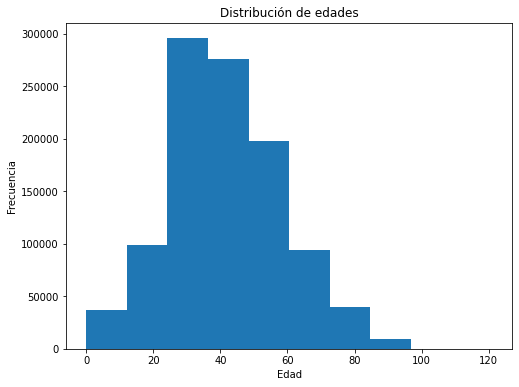

In [29]:
# Histograma para la columna 'AGE'
plt.figure(figsize=(8, 6))
plt.hist(df['AGE'], bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.show()

La mayoria de los pacientes oscila entre los 25 y los 60 años.

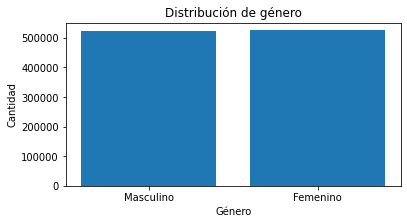

In [30]:
# Gráfico de barras para la columna 'SEX'
sex_counts = df['SEX'].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de género')
plt.xticks(sex_counts.index, ['Femenino', 'Masculino'])
plt.show()

Tras el cambio realizado al analizar la columna PREGNANT se comprueba la compensación en el género.

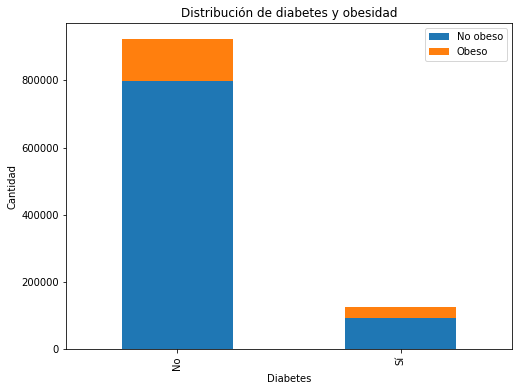

In [31]:
# Gráfico de barras apiladas para las columnas 'DIABETES' y 'OBESITY'
diabetes_obesity_counts = df.groupby(['DIABETES', 'OBESITY']).size().unstack()
diabetes_obesity_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Diabetes')
plt.ylabel('Cantidad')
plt.title('Distribución de diabetes y obesidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(['No obeso', 'Obeso'])
plt.show()

En este grafico vemos que una gran cantidad de los pacientes que tenian diabetes tambien tenian obesidad

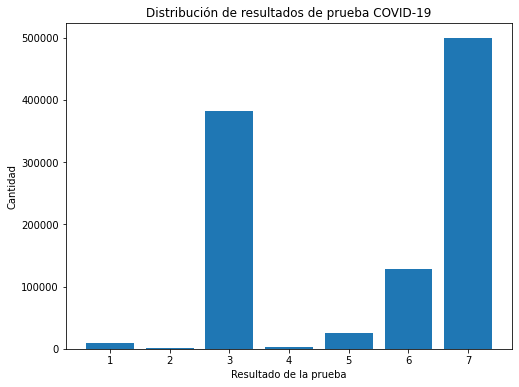

In [32]:
# Gráfico de barras para la columna 'CLASIFFICATION_FINAL'
classification_counts = df['CLASIFFICATION_FINAL'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(classification_counts.index, classification_counts.values)
plt.xlabel('Resultado de la prueba')
plt.ylabel('Cantidad')
plt.title('Distribución de resultados de prueba COVID-19')
plt.show()

Resultados de la prueba de COVID. Los valores 1-3 significan que al paciente se le diagnosticó COVID 
en diferentes grados. 4 o más alto significa que el paciente no es portador de COVID o que la prueba es inconclusa.

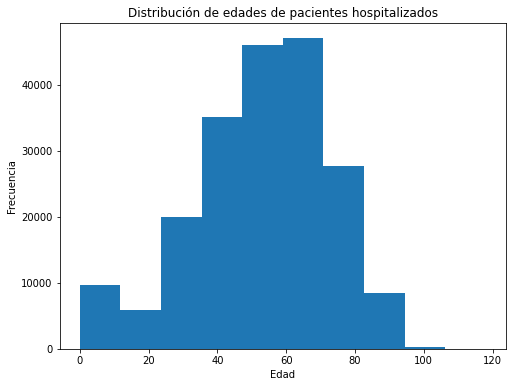

In [33]:
# Filtrar los pacientes hospitalizados
hospitalized_patients = df[df['PATIENT_TYPE'] == 0]

# Gráfico de histograma para las edades de los pacientes hospitalizados
plt.figure(figsize=(8, 6))
plt.hist(hospitalized_patients['AGE'], bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades de pacientes hospitalizados')
plt.show()

De aquí concluyo que hay mas complicaciones con niños que adolescentes , y los adultos cuanto mayor 
es la edad mas frecuente la hospitalizacion.

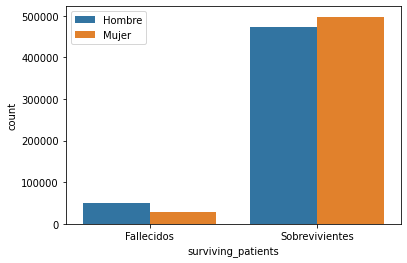

In [34]:
sns.countplot(df, x= 'surviving_patients', hue='SEX')
plt.xticks([0, 1], ['Fallecidos', 'Sobrevivientes'])
plt.legend(['Hombre', 'Mujer'])
plt.show()

En este gráfico se puede apreciar que la mayoría de los pacientes sobrevivieron, y que de entre los fallecidos, los hombres parecen ser los más vulnerables.   

array([[<Axes: title={'center': 'USMER'}>,
        <Axes: title={'center': 'MEDICAL_UNIT'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'PATIENT_TYPE'}>],
       [<Axes: title={'center': 'PNEUMONIA'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'DIABETES'}>,
        <Axes: title={'center': 'COPD'}>],
       [<Axes: title={'center': 'ASTHMA'}>,
        <Axes: title={'center': 'INMSUPR'}>,
        <Axes: title={'center': 'HIPERTENSION'}>,
        <Axes: title={'center': 'OTHER_DISEASE'}>],
       [<Axes: title={'center': 'CARDIOVASCULAR'}>,
        <Axes: title={'center': 'OBESITY'}>,
        <Axes: title={'center': 'RENAL_CHRONIC'}>,
        <Axes: title={'center': 'TOBACCO'}>],
       [<Axes: title={'center': 'CLASIFFICATION_FINAL'}>,
        <Axes: title={'center': 'surviving_patients'}>, <Axes: >,
        <Axes: >]], dtype=object)

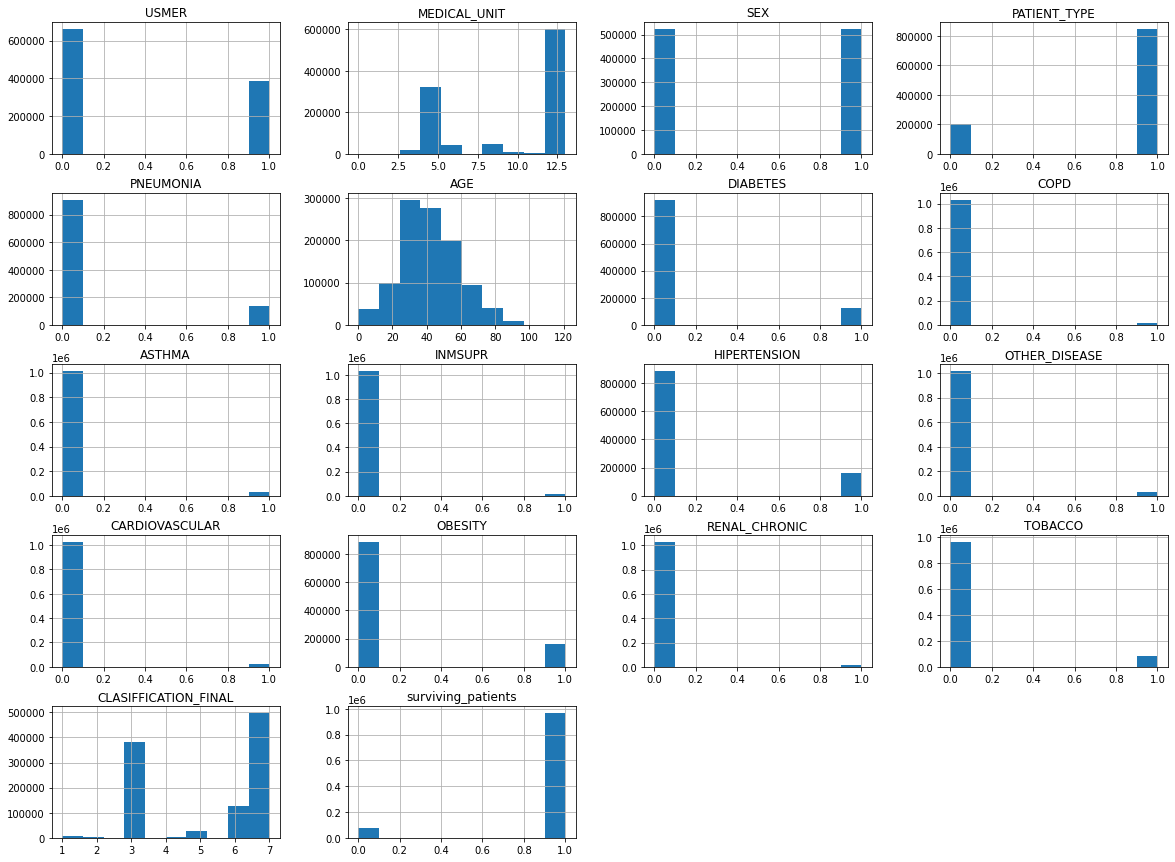

In [35]:
df.hist(figsize=(20,15))

Viendo estos gráficos, adelanto que exceptuando AGE, ninguna de las demas columnas sigue una distribución normal, en lo que al tratado de outliers concierne.

## Outliers

Como comenté anteriormente el único gráfico con pinta de distribuición normal es la de **AGE**

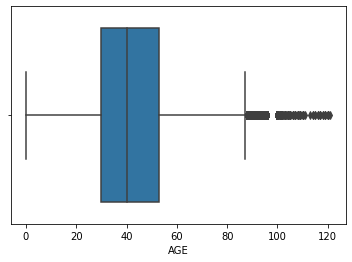

In [36]:
# Crear un boxplot de la columna "AGE"
sns.boxplot(x=df['AGE'])

# Mostrar el gráfico
plt.show()

Debido a la relativa gran cantidad de muestras, decido tratarlas como valores dentro de lo normal.

## Examinar los distintos órdenes de magnitud/ Datos categóricos

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   PNEUMONIA             1048575 non-null  int64  
 5   AGE                   1048575 non-null  float64
 6   DIABETES              1048575 non-null  int64  
 7   COPD                  1048575 non-null  int64  
 8   ASTHMA                1048575 non-null  int64  
 9   INMSUPR               1048575 non-null  int64  
 10  HIPERTENSION          1048575 non-null  int64  
 11  OTHER_DISEASE         1048575 non-null  int64  
 12  CARDIOVASCULAR        1048575 non-null  int64  
 13  OBESITY               1048575 non-null  int64  
 14  RENAL_CHRONIC         1048575 non-

Dado quetodas las columnas son numéricas, no hay datos categóricos que deban ser tratados. Aunque decido convertir **AGE** en número entero para que no desentone con el resto.

In [38]:
df['AGE'] = df['AGE'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   PNEUMONIA             1048575 non-null  int64
 5   AGE                   1048575 non-null  int64
 6   DIABETES              1048575 non-null  int64
 7   COPD                  1048575 non-null  int64
 8   ASTHMA                1048575 non-null  int64
 9   INMSUPR               1048575 non-null  int64
 10  HIPERTENSION          1048575 non-null  int64
 11  OTHER_DISEASE         1048575 non-null  int64
 12  CARDIOVASCULAR        1048575 non-null  int64
 13  OBESITY               1048575 non-null  int64
 14  RENAL_CHRONIC         1048575 non-null  int64
 15  TOBACCO        

## Selección de variables

<Axes: >

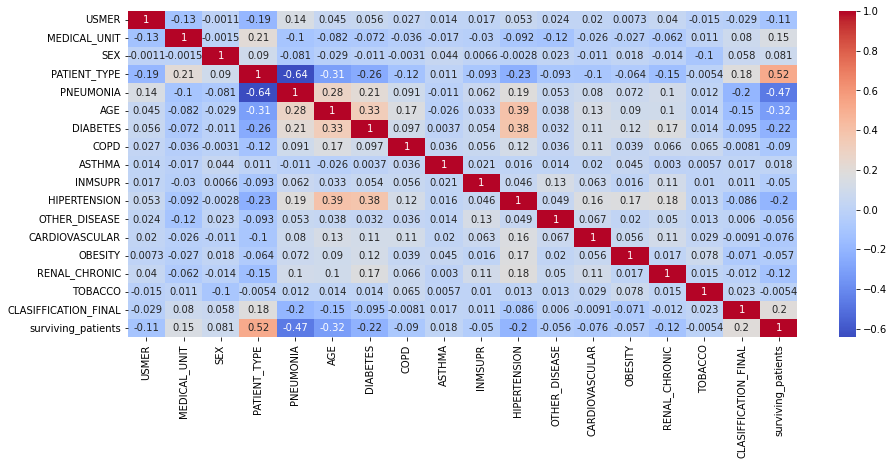

In [40]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

No parece haber ninguna columna que solape a otra en cuanto a información, por lo que en principio las conservaré todas.

## Desbalanceo en objetivo

<Axes: xlabel='surviving_patients', ylabel='count'>

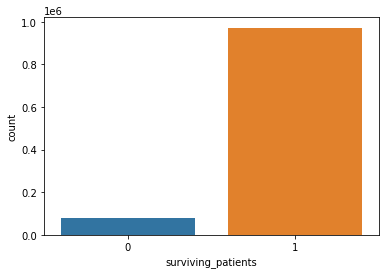

In [41]:
sns.countplot(data=df,x='surviving_patients')

El desbalanceo es notorio y en caso de querer balancearlo tendría más sentido sobremuestrear la cantidad de fallecidos que reducir la cantidad de sobrevivientes. Voy a tratar de hacer los módelos de esta manera, pero si veo que tarda demasiado de esta, probaré a hacerlos sin balancear.

In [42]:
from imblearn.over_sampling import SMOTE

# Separar las características y la variable objetivo
X = df.drop('surviving_patients', axis=1)
y = df['surviving_patients']

# Aplicar la técnica de sobremuestreo SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos sobremuestreados
oversampled_df = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['surviving_patients'] = y_resampled

In [43]:
value_counts = oversampled_df["surviving_patients"].value_counts()
print(value_counts)

surviving_patients
0    971633
1    971633
Name: count, dtype: int64


Ahora que las variables están igualadas, puedo pasar al Entrenamiento de los modelos.

## Entrenamiento de los modelos

In [44]:
from sklearn.model_selection import train_test_split

X = oversampled_df.drop("surviving_patients", axis=1)
y = oversampled_df["surviving_patients"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(X_train.columns)

17

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

### Regresión logística

/home/ulises/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 91%

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    243036
           1       0.93      0.89      0.91    242781

    accuracy                           0.91    485817
   macro avg       0.91      0.91      0.91    485817
weighted avg       0.91      0.91      0.91    485817



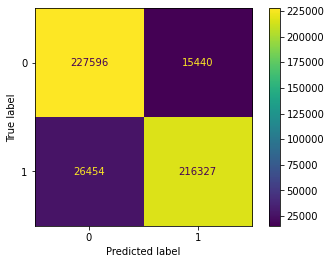

In [271]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)

### Naive bayes

Accuracy score: 90%

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    243036
           1       0.92      0.88      0.90    242781

    accuracy                           0.90    485817
   macro avg       0.90      0.90      0.90    485817
weighted avg       0.90      0.90      0.90    485817



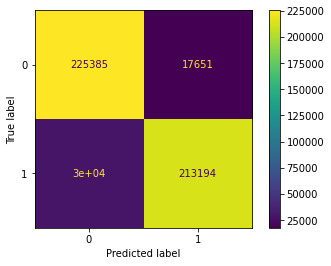

In [272]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

show_metrics(gaussian, y_test, y_pred)

### Decision tree

Accuracy score: 93%

              precision    recall  f1-score   support

           0       0.91      0.97      0.94    243036
           1       0.97      0.91      0.94    242781

    accuracy                           0.94    485817
   macro avg       0.94      0.94      0.94    485817
weighted avg       0.94      0.94      0.94    485817



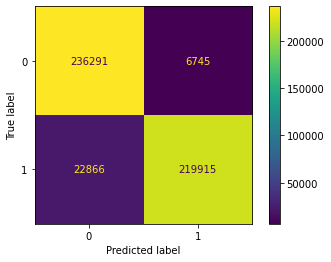

In [273]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

### Random forest

Accuracy score: 93%

              precision    recall  f1-score   support

           0       0.91      0.97      0.94    243036
           1       0.97      0.91      0.94    242781

    accuracy                           0.94    485817
   macro avg       0.94      0.94      0.94    485817
weighted avg       0.94      0.94      0.94    485817



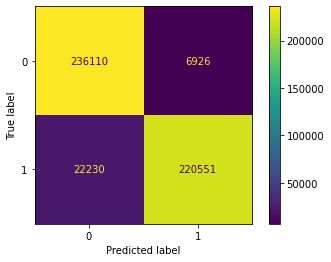

In [274]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

In [275]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
PATIENT_TYPE,0.461
AGE,0.191
PNEUMONIA,0.183
CLASIFFICATION_FINAL,0.048
MEDICAL_UNIT,0.048
DIABETES,0.013
HIPERTENSION,0.012
SEX,0.011
USMER,0.009


<Axes: xlabel='feature'>

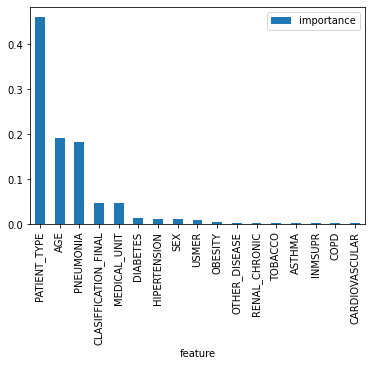

In [276]:
importances.plot.bar()

### Support vector machines 

In [ ]:
'''
from sklearn.svm import SVC, LinearSVC

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(random_forest, y_test, y_pred)
'''

Nunca termina de cargar.

### KNN

In [ ]:
'''
from sklearn.neighbors import KNeighborsClassifier

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
'''

idem que SVM.

## Entrenamiento de los modelos sin el oversampled

In [278]:
from sklearn.model_selection import train_test_split

X = df.drop("surviving_patients", axis=1)
y = df["surviving_patients"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(X_train.columns)

17

### Regresión Logística

/home/ulises/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 93%

              precision    recall  f1-score   support

           0       0.59      0.43      0.50     19014
           1       0.96      0.98      0.97    243130

    accuracy                           0.94    262144
   macro avg       0.78      0.71      0.73    262144
weighted avg       0.93      0.94      0.93    262144



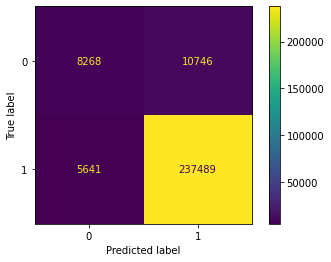

In [279]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)

### Naive bayes

Accuracy score: 88%

              precision    recall  f1-score   support

           0       0.36      0.77      0.49     19014
           1       0.98      0.89      0.93    243130

    accuracy                           0.88    262144
   macro avg       0.67      0.83      0.71    262144
weighted avg       0.94      0.88      0.90    262144



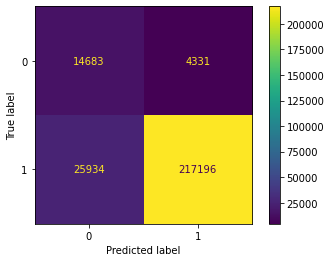

In [280]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

show_metrics(gaussian, y_test, y_pred)

Visto lo visto, me voy a detener aquí, ya que la precisión a la hora de obtener los fallecidos es previsiblemente escasa, siendo por lo tanto preferible los modelos hechos con el oversampled.

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = oversampled_df.drop("surviving_patients", axis=1)
y = oversampled_df["surviving_patients"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 50, None]
}

# Create a based model
rf = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

print(f'En el mejor test ha fallado {(y_test != y_pred).sum()} de {X_test.shape[0]}')
'''

Fitting 3 folds for each of 18 candidates, totalling 54 fits


Al tratar de usar el Gridsearch con el dataframe oversampled, el kernel directamente se me muere.

## Red Neuronal

In [46]:
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-07-06 01:00:01.007779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 01:00:01.455973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 01:00:01.457977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:00:03.677815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(oversampled_df.drop('surviving_patients', axis=1), oversampled_df['surviving_patients'], test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Crear el callback de TensorBoard
tensorboard_callback = TensorBoard(log_dir="logs/fit")

# Entrenar la red neuronal
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[tensorboard_callback])

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

2023-07-06 01:00:39.674726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-06 01:00:39.689011: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
42509/42509 [==============================] - 299s 7ms/step - loss: 0.2190 - accuracy: 0.9204 - val_loss: 0.2163 - val_accuracy: 0.9216
Epoch 2/10
42509/42509 [==============================] - 285s 7ms/step - loss: 0.2140 - accuracy: 0.9222 - val_loss: 0.2131 - val_accuracy: 0.9228
Epoch 3/10
42509/42509 [==============================] - 304s 7ms/step - loss: 0.2123 - accuracy: 0.9229 - val_loss: 0.2123 - val_accuracy: 0.9233
Epoch 4/10
 7463/42509 [====>.........................] - ETA: 3:32 - loss: 0.2120 - accuracy: 0.9227